In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns

### Initial Data Analysis

In [5]:
raw_df = pd.read_csv(r'data\raw_ckd.csv')
raw_df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [6]:
corr = raw_df.corr()
corr

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
age,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928,-0.242119,0.118339,-0.268896
bp,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540,-0.326319,0.029753,-0.261936
sg,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582,0.603560,-0.236215,0.579476
al,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632,-0.611891,0.231989,-0.566437
su,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775,-0.239189,0.184893,-0.237448
bgr,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189,-0.301385,0.150015,-0.281541
bu,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360,-0.607621,0.050462,-0.579087
sc,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670,-0.404193,-0.006390,-0.400852
sod,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183,0.376914,0.007277,0.344873
pot,0.058377,0.075151,-0.072787,0.129038,0.219450,0.066966,0.357049,0.326107,0.097887,1.000000,-0.133746,-0.163182,-0.105576,-0.158309


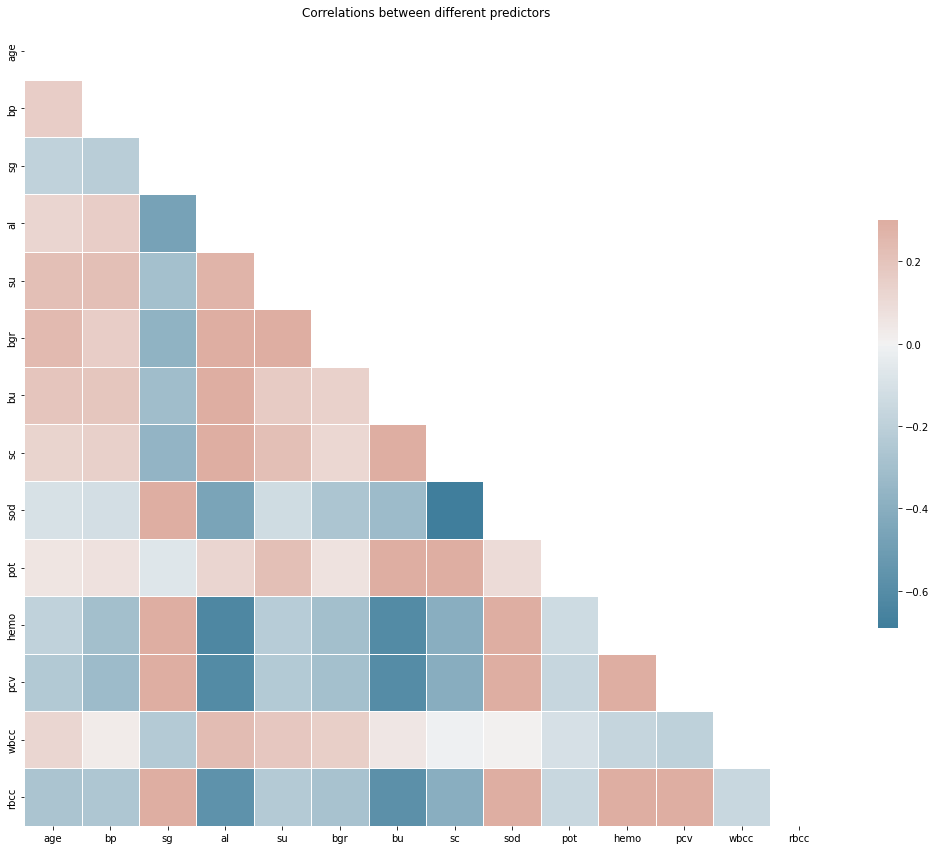

In [7]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlations between different predictors')
plt.show()

#### There seems to be quite a few correlated features. Best features are to be selected by applying appropriate Feature scaling technique

In [8]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

### Target variable(class) visualization for Categorical columns

<AxesSubplot:xlabel='rbc'>

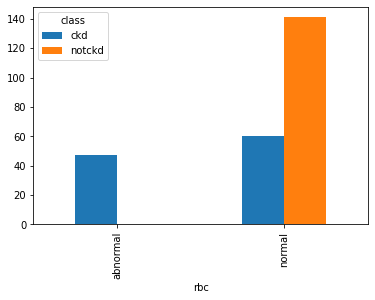

In [9]:
# Red Blood cell

data = raw_df.groupby(['rbc','class']).size().unstack(level=1)
data.plot(kind = 'bar')

Observations:

In the data set all cases with 'abnormal' rbc belongs to class ckd(positive class). 
Cases with 'normal' rbc too belong to ckd class

<AxesSubplot:xlabel='pc'>

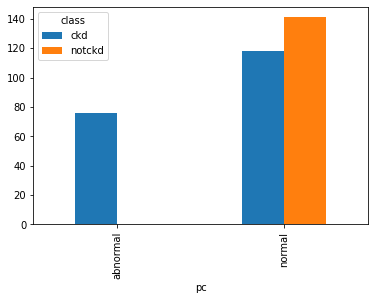

In [10]:
# Pus cell

data = raw_df.groupby(['pc','class']).size().unstack(level=1)
data.plot(kind = 'bar')

Observations:

In the data set all cases with 'abnormal' pc belongs to class ckd(positive class).

<AxesSubplot:xlabel='pcc'>

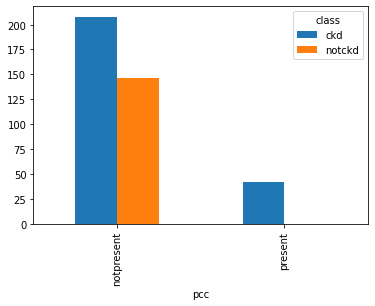

In [11]:
# Pus Cell Clumps

data = raw_df.groupby(['pcc','class']).size().unstack(level=1)
data.plot(kind = 'bar')

Observations:

In the data set all cases with 'present' pcc belongs to class ckd(positive class).

<AxesSubplot:xlabel='ba'>

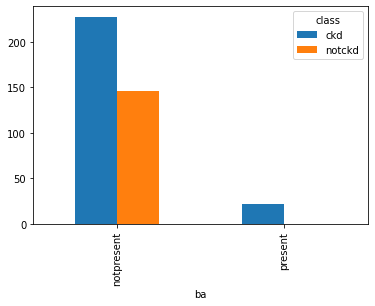

In [12]:
# Bacteria

data = raw_df.groupby(['ba','class']).size().unstack(level=1)
data.plot(kind = 'bar')

Observations:

In the data set all cases with 'present' ba belongs to class ckd(positive class).

<AxesSubplot:xlabel='htn'>

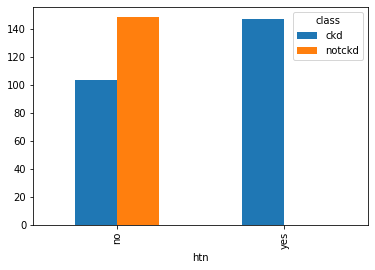

In [13]:
# Hypertension

data = raw_df.groupby(['htn','class']).size().unstack(level=1)
data.plot(kind = 'bar')

Observations:

In the data set all cases with 'yes' htn belongs to class ckd(positive class).

<AxesSubplot:xlabel='dm'>

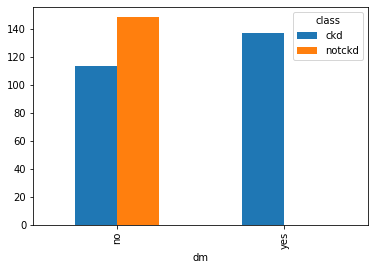

In [14]:
# Diabetes Mellitus

data = raw_df.groupby(['dm','class']).size().unstack(level=1)
data.plot(kind = 'bar')

Observations:

In the data set all cases with 'yes' dm belongs to class ckd(positive class).

<AxesSubplot:xlabel='cad'>

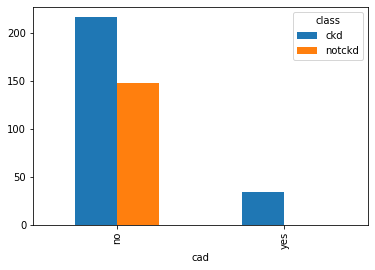

In [15]:
# Coronary Artery Disease

data = raw_df.groupby(['cad','class']).size().unstack(level=1)
data.plot(kind = 'bar')

Observations:

In the data set all cases with 'yes' cad belongs to class ckd(positive class).

<AxesSubplot:xlabel='appet'>

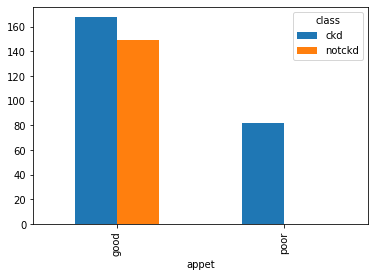

In [16]:
# Appetite

data = raw_df.groupby(['appet','class']).size().unstack(level=1)
data.plot(kind = 'bar')

Observations:

In the data set all cases with 'poor' appet belongs to class ckd(positive class).

<AxesSubplot:xlabel='pe'>

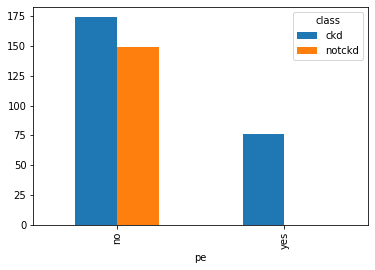

In [17]:
# Pedal Edema

data = raw_df.groupby(['pe','class']).size().unstack(level=1)
data.plot(kind = 'bar')

Observations:

In the data set all cases with 'yes' pe belongs to class ckd(positive class).

<AxesSubplot:xlabel='ane'>

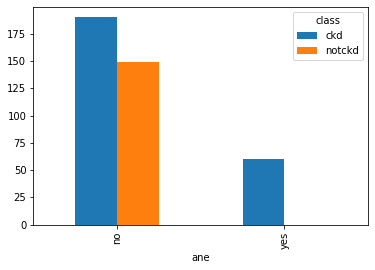

In [18]:
# Anemia

data = raw_df.groupby(['ane','class']).size().unstack(level=1)
data.plot(kind = 'bar')

Observations:

In the data set all cases with 'yes' ane belongs to class ckd(positive class).

<AxesSubplot:xlabel='ane'>

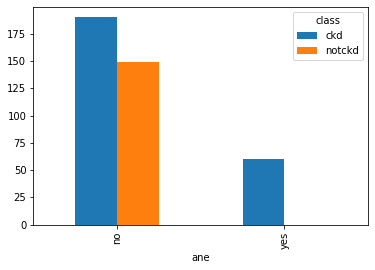

In [19]:
# Anemia

data = raw_df.groupby(['ane','class']).size().unstack(level=1)
data.plot(kind = 'bar')

Observations:

In the data set all cases with 'yes' ane belongs to class ckd(positive class).

<AxesSubplot:xlabel='class'>

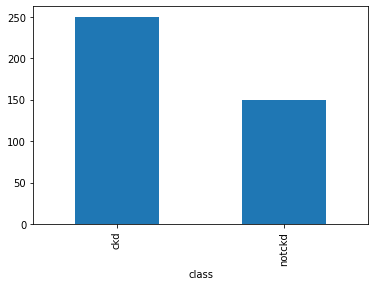

In [20]:
# Disease detection 

data = raw_df.groupby(['class']).size()#.unstack(level=1)
data.plot(kind = 'bar')

In [21]:
raw_df['class'].value_counts()

ckd       250
notckd    150
Name: class, dtype: int64

Observations:

In the data set 250 records are wit 'ckd' and 150 are with 'notckd' class.